# CNN with keras

copied from here: https://towardsdatascience.com/build-your-own-convolution-neural-network-in-5-mins-4217c2cf964f

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [20]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28


## data import

In [ ]:
from keras.datasets import mnist
mnist.load_data()

sadly this sometimes does not work....<br>
so we need to download the data manually

In [26]:

import gzip
import pickle

with gzip.open('mnist.pkl.gz','rb') as ff :
    u = pickle._Unpickler( ff )
    u.encoding = 'latin1'
    (x_train,y_train), (x_test,y_test) = u.load()

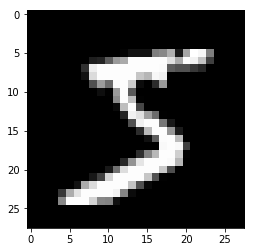

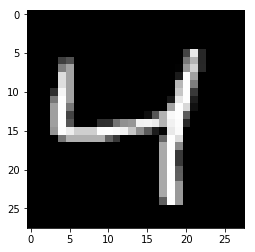

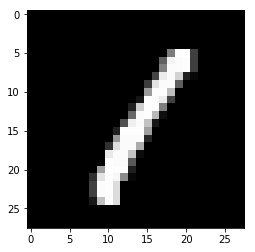

In [34]:

#plot the first image in the dataset
plt.imshow(x_train[0], cmap='gray')
plt.show()
plt.imshow(x_train[2], cmap='gray')
plt.show()
plt.imshow(x_train[3], cmap='gray')
plt.show()


## preprocessing data

In [21]:

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## network architecture

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate =0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))

In [24]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 198s 3ms/step - loss: 1.7464 - acc: 0.8350 - val_loss: 0.0666 - val_acc: 0.9785
Epoch 2/12
60000/60000 [==============================] - 242s 4ms/step - loss: 0.1181 - acc: 0.9660 - val_loss: 0.0511 - val_acc: 0.9835
Epoch 3/12
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0859 - acc: 0.9748 - val_loss: 0.0551 - val_acc: 0.9831
Epoch 4/12
60000/60000 [==============================] - 248s 4ms/step - loss: 0.0687 - acc: 0.9799 - val_loss: 0.0365 - val_acc: 0.9870
Epoch 5/12
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0579 - acc: 0.9828 - val_loss: 0.0397 - val_acc: 0.9869
Epoch 6/12
60000/60000 [==============================] - 215s 4ms/step - loss: 0.0502 - acc: 0.9855 - val_loss: 0.0379 - val_acc: 0.9883
Epoch 7/12
60000/60000 [==============================] - 187s 3ms/step - 

In [39]:
ypred = model.predict(x_test)
print(ypred[0:10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


In [ ]:
ypred = [np.argmax(pred) for pred in ypred]
print(ypred[0:10])

In [37]:
x_test = x_test.reshape(10000,28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [52]:
print(np.where(y_test != ypred)[0:10])

(array([ 115,  247,  259,  321,  340,  445,  582,  619,  674,  881,  938,
        947, 1014, 1112, 1232, 1242, 1247, 1260, 1319, 1326, 1393, 1414,
       1500, 1530, 1621, 1681, 1709, 1717, 1737, 1754, 1790, 1878, 2018,
       2043, 2053, 2070, 2118, 2129, 2130, 2135, 2185, 2293, 2329, 2369,
       2414, 2454, 2597, 2654, 2742, 2771, 2896, 2927, 2939, 2995, 3030,
       3073, 3225, 3289, 3342, 3503, 3520, 3534, 3767, 3778, 3780, 3808,
       3853, 3906, 3941, 4017, 4126, 4176, 4224, 4382, 4571, 4575, 4731,
       4740, 4807, 4814, 4823, 4860, 4911, 5331, 5642, 5676, 5955, 6101,
       6173, 6571, 6576, 6597, 6625, 6651, 6783, 7928, 8325, 8520, 8527,
       9009, 9015, 9019, 9280, 9620, 9634, 9638, 9642, 9669, 9692, 9698,
       9729, 9792, 9839]),)


In [50]:
y_test != ypred

array([False, False, False, ..., False, False, False])

9


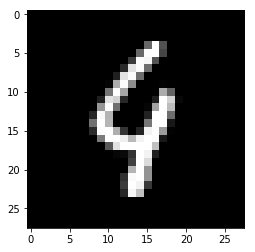

6


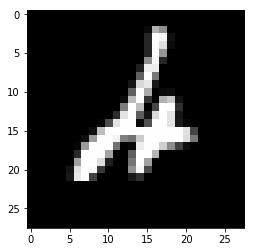

0


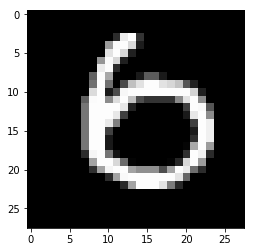

7


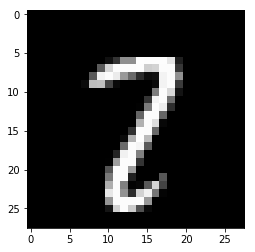

3


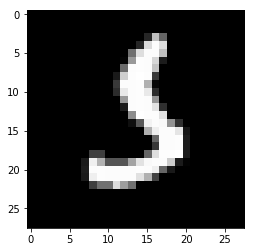

In [55]:
x_test = x_test.reshape(10000,28,28)
print(ypred[115])
plt.imshow(x_test[115], cmap='gray')
plt.show()
print(ypred[247])
plt.imshow(x_test[247], cmap='gray')
plt.show()
print(ypred[259])
plt.imshow(x_test[259], cmap='gray')
plt.show()
print(ypred[321])
plt.imshow(x_test[321], cmap='gray')
plt.show()
print(ypred[340])
plt.imshow(x_test[340], cmap='gray')
plt.show()
